## Uppgift 2 - uppvärmning vaccindata
I uppgifterna nedan ska du använda dig av datasetet vaccin och bladet Vaccinerade kommun och ålder.
Använd Plotly express för att rita diagrammen nedan för de uppgifter som kräver diagram. Använd Pandas
för att svara på frågor om datasetet.

In [137]:
import pandas as pd
import plotly_express as px
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


df = pd.read_excel("../Labb/Data/Vaccine.xlsx")
df.head()


,Vecka,År,Region,Antal vaccinationer
0,52,2020,| Sverige |,2478
1,52,2020,Stockholm,289
2,52,2020,Uppsala,9
3,52,2020,Södermanland,116
4,52,2020,Östergötland,214


In [138]:
df_vaccine = pd.read_excel("../Labb/Data/Vaccine.xlsx", sheet_name="Vaccinerade kommun och ålder")
df_vaccine.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,NaN,0.755865,0.714675,0.392526,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,NaN,0.805068,0.781601,0.535416,NaN


In [139]:
df_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Län                  2900 non-null   int64  
 1   Län_namn             2900 non-null   object 
 2   Kommun               2900 non-null   int64  
 3   Kommun_namn          2900 non-null   object 
 4   Ålder                2900 non-null   object 
 5   Befolkning           2900 non-null   int64  
 6   Antal minst 1 dos    2900 non-null   int64  
 7   Antal minst 2 doser  2900 non-null   int64  
 8   Antal 3 doser        2320 non-null   float64
 9   Antal 4 doser        870 non-null    float64
 10  Andel minst 1 dos    2900 non-null   float64
 11  Andel minst 2 doser  2900 non-null   float64
 12  Andel 3 doser        2320 non-null   float64
 13  Andel 4 doser        870 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 317.3+ KB


 # a) Hur många län finns representerade i datasetet?

In [140]:
df_vaccine.describe(include=[object])

,Län_namn,Kommun_namn,Ålder
count,2900,2900,2900
unique,21,290,10
top,Västra Götalands län,Upplands Väsby,12-15
freq,490,10,290


In [141]:
result = df_vaccine["Län"].unique()
print(result)
print(f"Number of countries are represented in dataset = ",len(result))

[ 1  3  4  5  6  7  8  9 10 12 13 14 17 18 19 20 21 22 23 24 25]
Number of countries are represented in dataset =  21


# b) Hur många kommuner finns representerade i datasetet?

In [142]:
df_kommun = df_vaccine["Kommun"].unique()
#print(df_kommun)
print(f"Number of municipalities are represented in the dataset = ", len(df_kommun))

Number of municipalities are represented in the dataset =  290


In [143]:
df_vaccine.describe(include=[object])

,Län_namn,Kommun_namn,Ålder
count,2900,2900,2900
unique,21,290,10
top,Västra Götalands län,Upplands Väsby,12-15
freq,490,10,290


# c) Hur stor är befolkningen som är representerad i datasetet?

In [144]:
df_vaccine.groupby("Ålder")["Befolkning"].sum()

Ålder
12-15              503831
16-17              241539
18-29             1475950
30-39             1467590
40-49             1298156
50-59             1339798
60-69             1121922
70-79             1033113
80-89              496750
90 eller äldre     114141
Name: Befolkning, dtype: int64

In [145]:
df_vaccine["Befolkning"].sum()

9092790

# d) Beräkna hur många barn under 18 år det finns i Sverige baserat på det här datasetet. Du får leta uppstatistik på hur stor totala befolkningen är i Sverige.


In [146]:
df_vaccine["Ålder"] 

0                12-15
1                16-17
2                18-29
3                30-39
4                40-49
             ...      
2895             50-59
2896             60-69
2897             70-79
2898             80-89
2899    90 eller äldre
Name: Ålder, Length: 2900, dtype: object

In [147]:
#df_vaccine["Ålder"] = df_vaccine["Ålder"].str.replace("-","").str.replace("eller äldre", "").astype(int)
#df_vaccine["Ålder"] 

# e) Rita ett diagram som visar på åldersfördelningen av Sveriges befolkning.

In [148]:
df_vaccine["Befolkning"]

0       2422
1       1203
2       6692
3       7332
4       6946
        ... 
2895    3079
2896    2781
2897    2194
2898    1280
2899     219
Name: Befolkning, Length: 2900, dtype: int64

<AxesSubplot: >

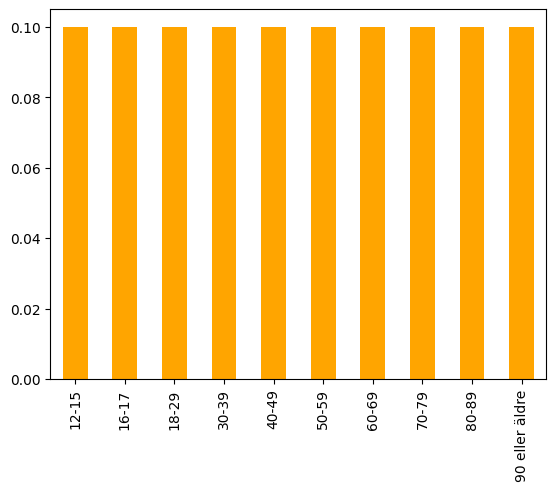

In [149]:
df_vaccine.Ålder.value_counts(normalize = True).plot(kind = "bar", color = 'orange')


In [150]:
fig = px.bar(
    data_frame=df_vaccine,
    
    x="Ålder",
    y="Befolkning",
    color = "Län_namn",
    labels={"Ålder": "Ålder", "befolkning": "Befolkning"},
    title="Åldersfördelningen av Sveriges befolkning",
    
)
fig.show()

# f) Rita stapeldiagram för andel med minst 1 dos per län, andel två doser per län och andel tre doser per län

In [152]:

fig = px.bar(
    data_frame=df_vaccine,
    
    x= "Län_namn",
    y= ["Antal minst 1 dos","Antal minst 2 doser", "Antal 3 doser"],
   
    labels={"x": "Lån", "y": "Doser"},
    title="Åldersfördelningen av Sveriges befolkning",
    barmode='group'
    
)

fig.show()

# f) Tag Västra Götalands län och Stockholms län och rita diagram över andelen vaccinerade med minst 1 dos,två doser, tre doser och fyra doser

In [ ]:
#(df_merge["Folkmängd 2020"]/df_merge["Folkmängd 2020"].sum())*100


In [161]:
df_vaccine = df_vaccine.query("Län_namn == ('Västra Götalands', 'Stockholms län')")
df_vaccine

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,NaN,0.755865,0.714675,0.392526,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,NaN,0.805068,0.781601,0.535416,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1,Stockholms län,192,Nynäshamn,50-59,4135,3706,3631,3019.0,NaN,0.896252,0.878114,0.730109,NaN
256,1,Stockholms län,192,Nynäshamn,60-69,3341,3088,3043,2765.0,NaN,0.924274,0.910805,0.827597,NaN
257,1,Stockholms län,192,Nynäshamn,70-79,3311,3163,3125,2973.0,2390.0,0.955301,0.943824,0.897916,0.721836
258,1,Stockholms län,192,Nynäshamn,80-89,1530,1488,1475,1425.0,1224.0,0.972549,0.964052,0.931373,0.800000
